# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

In this notebook, you'll build your own neural network. 

In [1]:
import torch
from torchvision import datasets, transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

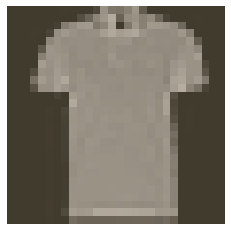

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [3]:
# Network architecture.

from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.LogSoftmax(dim=1)
        )

print(model)


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


# Train the network

In [4]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [5]:
# Training the network.

epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")        

Training loss: 0.522864059551057
Training loss: 0.38914029702131175
Training loss: 0.3551895478323324
Training loss: 0.33443545450819834
Training loss: 0.31878716080808944
Training loss: 0.300605743503901
Training loss: 0.2902081605436197
Training loss: 0.28045168767637535
Training loss: 0.2756384148208826
Training loss: 0.2658802990847305
Training loss: 0.2610170238419001
Training loss: 0.25376721451293305
Training loss: 0.24638766255269426
Training loss: 0.24311370456190123
Training loss: 0.238398743662308


In [6]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

In [7]:
## TODO: Train your model with dropout, and monitor the training progress with the validation loss and accuracy

model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()
        log_ps = model(images)
        train_loss = criterion(log_ps, labels)
        train_loss.backward()
        optimizer.step()        
        running_loss += train_loss.item()
        
    else:
        
        test_loss = 0
        accuracy = 0
        with torch.no_grad():            
            model.eval()
            for images, labels in testloader:
                
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                
                equals = top_class == labels.view(top_class.shape)                
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        model.train()
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print('Epochs : {}/{}..'.format(e+1, epochs),
             'Training loss : {:.3f}..'.format(running_loss/len(trainloader)),
             'Testing loss : {:.3f}..'.format(test_loss/len(testloader)),
             'Test accuracy : {:.3f}'.format(accuracy/len(testloader)))
                
        

Epochs : 1/30.. Training loss : 0.617.. Testing loss : 0.478.. Test accuracy : 0.828
Epochs : 2/30.. Training loss : 0.483.. Testing loss : 0.438.. Test accuracy : 0.841
Epochs : 3/30.. Training loss : 0.450.. Testing loss : 0.434.. Test accuracy : 0.844
Epochs : 4/30.. Training loss : 0.436.. Testing loss : 0.428.. Test accuracy : 0.844
Epochs : 5/30.. Training loss : 0.419.. Testing loss : 0.403.. Test accuracy : 0.856
Epochs : 6/30.. Training loss : 0.411.. Testing loss : 0.416.. Test accuracy : 0.860
Epochs : 7/30.. Training loss : 0.404.. Testing loss : 0.391.. Test accuracy : 0.863
Epochs : 8/30.. Training loss : 0.399.. Testing loss : 0.414.. Test accuracy : 0.857
Epochs : 9/30.. Training loss : 0.391.. Testing loss : 0.402.. Test accuracy : 0.859
Epochs : 10/30.. Training loss : 0.392.. Testing loss : 0.391.. Test accuracy : 0.861
Epochs : 11/30.. Training loss : 0.388.. Testing loss : 0.397.. Test accuracy : 0.865
Epochs : 12/30.. Training loss : 0.380.. Testing loss : 0.380..

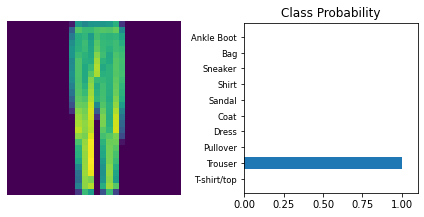

In [8]:
import helper
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

img = img.view(1, 784)
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')